In [ ]:
import torch
import numpy as np

In [ ]:
# Tensors are used to encode inputs and outputs of a model, as well as matrices

data = ([1, 2], [3, 4]) # define 2x2 matrix
x_data = torch.tensor(data)

print(x_data.shape)

torch.Size([2, 2])


In [ ]:
#shape is a tuple of tensor dimensions; in the functions belw, it determines the dimensionality of the output tensors

shape = (2, 3,)
rand_tensor = torch.rand(shape) # random values between 0 and 1
ones_tensor = torch.ones(shape) # all 1
zeros_tensor = torch.zeros(shape) # all 0

# some of these tensor/numpy arrays will be used when initializing tensors in big models
# there are over 100 tensor operations in pytorch (including transposing, indexing, slicing, mathematical operations, ln alg, random sampling, etc)
# bootcamp will go over slicing, joining, and multiplication

print(f"{rand_tensor}")
print(f"{ones_tensor}")
print(f"{zeros_tensor}")

tensor([[0.1834, 0.1485, 0.3382],
        [0.6785, 0.1608, 0.1725]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# slicing pt 1

tensor = torch.ones(4, 4)
print (tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
# slicing pt 2

tensor[:, 1] = 0 # index/slice the second column to set values in that column to 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
#concat

t1 = torch.cat([tensor, tensor, tensor], dim = 0) #concatenate/join sequence of tensors

# dim 1 indicates that you should concatenate across columns
# dim 0 indicates that you should concatenate across rows
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# computing the element-wise product

print(f"tensor * tensor \n {tensor * tensor}")

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# computing a matrix multiplication between two tensors

print(f'{tensor @ tensor.T}')

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# neural networks are just multiplying a bunch of matrices together

# steps in neural network training procedure:
# 1. Define neural network that has some learnable parameters
# 2. Iterate over a dataset of inputs
# 3. Process input through network
# 4. Compute the loss (ie how far the output)
# 5. Propagate gradients back into network
# 6. Update the weights of the network, typically by using a simple update rule (ex: weight = weight - learning_rate * gradient)

In [ ]:
# Defining neural network

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): # Pass in module through net to create variables necessary to initialize network

    def __init__(self): # defines layers of neural network
        super(Net, self).__init__()
        # kernel - 1 imput image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affline operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5x5 from image dimensions; takes 16x5x5 matrix and reduces it to 120-dimension matrix
        self.fc2 = nn.Linear(120, 84) # reduces dimension matrix to 84
        self.fc3 = nn.Linear(84, 10) # reduces dimension matrix to 10

    def forward(self, input): # function through which input passes through
        # Convolution Layer 1 (C1) - 1 input channel, 6 output channels; 5x5 square convolution
        # Uses RELU activation function, and outputs tensor with size (N, 6, 28, 28), where N is size of batch
        c1 = F.relu(self.conv1(input))

        # Submapping Layer 2 (S2) - 2x2 grid, purely functional; this layer does not have any parameter, and outputs a (N, 6, 14, 14) tensor
        s2 = F.max_pool2d(c1, (2, 2))

        # Convolution Layer 3 (C2) - 6 input, 16 output; 5x5 square convolution, RELU activation function; outputs a (N, 16, 10, 10) tensor
        c3 = F.relu(self.conv2(s2))

        # Subsampling Layer 4 (S4) - 2x2 grid, purely functional; layer has no parameter, outputs (N, 16, 5, 6) tensor
        s4 = F.max_pool2d(c3, 2)

        # Flatten operation - purely functional, (N, 400) tensor output
        s4 = torch.flatten(s4, 1)

        # Fully Connected Layer 5 (F5) - (N, 400) tensor input, (N, 120) tensor output; uses RELU activation function
        f5 = F.relu(self.fc1(s4))

        #Fully Connected Layer 6 (F6) - (N, 120) tensor input, (N, 84) tensor ouptut; uses RELU activation function
        f6 = F.relu(self.fc2(f5))

        # Gaussian Layer Output - (N, 84) tensor input, (N, 10) tensor output
        output = self.fc3(f6)

        return output

In [ ]:
def __init__(self):
    super(Net, self).__init__()
    # kernel - 1 input image channel, 6 output channels, 5x5 square convolution
    self.conv1 = nn.Conv2d(1, 6, 5)  # Corrected
    self.conv2 = nn.Conv2d(6, 16, 5) # Corrected
    # ... (rest of the code)

In [ ]:
# Show neural network structure summary

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# Calculate mean-squared error between output and target

input = torch.randn(1, 1, 32, 32) # dummy input
output = net(input)
target = torch.randn(10) # dummy target, values is number of dimensions
target = target.view(-1, 1) # make target the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.5108, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
# Backpropagate error (clear existing gradients beforeheand)

net.zero_grad() # zeroes gradient buffers of all parameters
loss.backward()

In [ ]:
# Update weights using Stochastic Gradient Descent (SGD)

import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.01) # model continues to learn after each epoch

# initialize optimizer in training loop
optimizer.zero_grad() # set gradient buffers to zero
output = net(input)
loss = criterion(output, target) # defined as MSE loss
loss.backward()
optimizer.step() # weights are updated

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
# Training Neural Network

import torch
import torchvision
import torchvision.transforms as transforms

num_workers = 2 # set number of threads used for process

batch_size = 4 # set number of samples in a given batch

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

In [ ]:
# Load in Training and Testing Data

trainset = torchvision.datasets.CIFAR10(
    root = './data', train = True, download = True, transform = transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size = batch_size, shuffle = True, num_workers = num_workers
) # makes data more readable by pytorch

testset = torchvision.datasets.CIFAR10(
    root = './data', train = False, download = True, transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size = batch_size, shuffle = False, num_workers = num_workers
)

classes = (
    'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
)

Files already downloaded and verified
Files already downloaded and verified


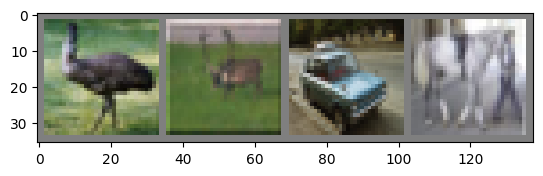

bird  deer  car   horse


In [ ]:
# Observe Training Data

import matplotlib.pyplot as plt
import numpy as np

def imshow(img): # function for showing images
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader) # pull random training images
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images)) #show images

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))



In [ ]:
# Define Convolutional Neural Network (copy neural network form before and modify to take three-channel images instead of 1-channel images)

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, use_convolutions:bool = False):
        super(Net, self).__init__()
        self.use_convolutions = use_convolutions

        self.conv1 = nn.Conv2d(3, 6, 5) # Number of input channels changed from 1 to 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.flat = nn.Flatten()
        self.conv_matcher = nn.Linear(3 * 32* 32, 16 * 5 * 5) # Linear layer to change dimensions or contract to another specific dimension

# NOTE: apply layers in order - linear, then activation, then linear, then activation, etc, until the end; the last layer is linear

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84) # 120 and 84 are hidden dimensions
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
      if self.use_convolutions:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch (flattening means the number of dimensions out such that the end dimensions are 1 * the output of that multiplication)
      else:
        x = self.flat(x)
        x = self.conv_matcher(x) # Linear matcher which converts
        x = F.relu(x)

      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)

      return  x

net = Net(use_convolutions = False)


In [ ]:
# Defining Loss Function and Optimizer

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)
scheduler = StepLR(optimizer, step_size = 10, gamma = 0.1) # Optional, since pytorch does it for you already; defines step size

In [ ]:
from logging import logProcesses
# Train the Network

def train_step(model, data, optimizer = optimizer, criterion = criterion, scheduler = None, data_idx = None):
  inputs, labels = data # pull training data

  optimizer.zero_grad() # reset gradients

  outputs = model(inputs) # pass inputs into model
  loss = criterion(outputs, labels) # compare model output with actual data
  loss.backward() # back propagate
  optimizer.step() # take another step

  return loss

def train_loop(
    model, dataloader, epochs = 2, optimizer = optimizer, criterion = criterion, scheduler = None, basename = './model'
):
  model.train() # set to training mode
  for epoch in range(epochs): # loop over dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0): # pass data through dataloader
      loss = train_step(model, data, optimizer, criterion, scheduler, data_idx = i)

      running_loss += loss.item() # print statistics
      if i % 2000 == 1999: #print every 2000 mini batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

    if scheduler is not None:
      scheduler.step()

    model.eval()

    print('Finished Training')

train_loop(net, trainloader, epochs = 2, scheduler = scheduler)


[1,  2000] loss: 2.057
[1,  4000] loss: 2.020
[1,  6000] loss: 2.050
[1,  8000] loss: 2.121
[1, 10000] loss: 2.125
[1, 12000] loss: 2.125
Finished Training
[2,  2000] loss: 2.176
[2,  4000] loss: 2.172
[2,  6000] loss: 2.182
[2,  8000] loss: 2.239
[2, 10000] loss: 2.233
[2, 12000] loss: 2.179
Finished Training


In [ ]:
# Save training model

PATH = './civer_net.pth'
torch.save(net.state_dict(), PATH)

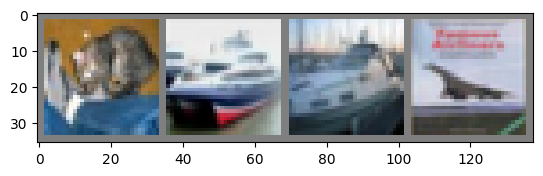

Groundtruth:  cat   ship  ship  plane


In [ ]:
# Test Network on Test Data

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Groundtruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
# Load Saved Model

net = Net(use_convolutions = False) # NOTE: make sure you keep use_convolutions the same way as when you trained the model
net.load_state_dict(torch.load(PATH))

<ipython-input-26-110cf350f442>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
# Change Model To Test Mode

net.eval() # changes model to evaluate rather than train
outputs = net(images)

In [ ]:
# Run Network on Test Data

_, predicted = torch.max(outputs, 1) # each output is an energy for every class; the higher the energy of a given class, the more the network thinks it's what the image is

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

# Non-convolutional model predicts only one kind of class for each image (this is call mode collapse)

Predicted:  plane plane plane plane


In [ ]:
# Switch to and Run Convoluted Neural Network (CNN)

c_net = Net(use_convolutions = True)
c_criterion = nn.CrossEntropyLoss()
c_optimizer = optim.SGD(c_net.parameters(), lr = 0.01, momentum = 0.9)
c_scheduler = StepLR(c_optimizer, step_size = 10, gamma = 0.1)

train_loop(c_net, trainloader, 2, c_optimizer, c_criterion, c_scheduler)

[1,  2000] loss: 2.099
[1,  4000] loss: 1.942
[1,  6000] loss: 1.955
[1,  8000] loss: 1.939
[1, 10000] loss: 1.965
[1, 12000] loss: 1.981
Finished Training
[2,  2000] loss: 1.978
[2,  4000] loss: 1.989
[2,  6000] loss: 1.989
[2,  8000] loss: 1.989
[2, 10000] loss: 2.036
[2, 12000] loss: 2.064
Finished Training


In [ ]:
# Save New CNN Output

PATH = './cifar_cnet.pth'
torch.save(c_net.state_dict(), PATH)

In [ ]:
# Run CNN on Test Batch

c_net.eval()
outputs = c_net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))


Predicted:  car   car   car   ship 


In [ ]:
# Run CNN on Test Dataset

correct = 0
total = 0

with torch.no_grad(): # since we're testing and not training, gradient outputs need not be calculated
  for data in testloader:
    images, labels = data
    outputs = c_net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 20 %


In [ ]:
# Examine Individual Class Success Rate

def eval_classes(model, dataloader):
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  with torch.no_grad(): # run predictions
    for data in dataloader:
      images, labels = data
      outputs = model(images)
      _, predictions = torch.max(outputs, 1)

      for label, prediction in zip(labels, predictions): # sort predictions by class
          if label == prediction:
            correct_pred[classes[label]] += 1
          total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items(): # calculate accuracy
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
      return correct_pred, total_pred

print('Class eval for net:\n___________________') # header
cp, tp = eval_classes(net, testloader)

for classname, correct_count in cp.items(): # display all classes
  accuracy = 100 * float(correct_count) / tp[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Class eval for c_net:\n___________________')
cp, tp = eval_classes(c_net, testloader )

for classname, correct_count in cp.items():
  accuracy = 100 * float(correct_count) / tp[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Class eval for net:
___________________
Accuracy for class: plane is 0.0 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 100.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
Class eval for c_net:
___________________
Accuracy for class: plane is 13.3 %
Accuracy for class: plane is 13.3 %
Accuracy for class: car   is 81.0 %
Accuracy for class: bird  is 1.3 %
Accuracy for class: cat   is 6.0 %
Accuracy for class: deer  is 44.4 %
Accuracy for class: dog   is 32.0 %
Accuracy for class: frog  is 0.5 %
Accuracy for class: horse is 0.8 %
Accuracy for class: ship  is 21.2 %
Accuracy for class: truck is 1.1 %


In [ ]:
# Train CNN on a GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # check if CUDA cores are available

print(device)

cpu
